In [12]:
import camelot
import pandas as pd

# Updated Process

## 1. Create empty dataframe with proper column names

In [13]:
# This is where data will be added after cleaning. The final dataframe for export

In [14]:
df = pd.DataFrame(columns = [
    "Common_name",
    "Species",
    "Status", 
    "BP_Rev", 
    "Häufig_keitsklasse", 
    "Trend_lang",
    "Trend_kurz",
    "Risik",
    "BE2013",
    "BE2003",
    "BB2008",
    "D2007"
])
df

,Common_name,Species,Status,BP_Rev,Häufig_keitsklasse,Trend_lang,Trend_kurz,Risik,BE2013,BE2003,BB2008,D2007


In [15]:
df.shape

(0, 12)

## 2. Setup mechanism to store accuracy report : QA step

In [16]:
accuracy = []

## 3. Dictionary of dataframes on the go

In [17]:
# Dictionary to collect dataframes created from each table
d = {}

## 4. Adding the list of pages to be parsed

In [18]:
pages = []
i = 5
while i < 14:
    pages.append(i)
    i = i + 1
print(pages)

[5, 6, 7, 8, 9, 10, 11, 12, 13]


## 5. Parsing through the pages

In [19]:
for i in pages:
    # print page number
    print (i)
    # create dataframe with page number
    d[i] = pd.DataFrame()
    #read the page
    tables = camelot.read_pdf('rote_liste_brutvoegel_witt_steiof.pdf', 
                              pages= str(i), 
                              flavor='stream', edge_tol=1000, row_tol=10)
    #tables = camelot.read_pdf('rote_liste_brutvoegel_witt_steiof.pdf', pages= str(i), flavor='lattice')
    # add the accuracy report
    accuracy.append(tables[0].parsing_report)
    # assign the first table to a dataframe
    d[i] = tables[0].df
    print(d[i].shape)
# Print Done once all pages are parsed
print ("Done")

5
(29, 12)
6
(28, 12)
7
(28, 12)
8
(28, 12)
9
(28, 12)
10
(28, 12)
11
(28, 12)
12
(27, 11)
13
(27, 12)
Done


In [20]:
# Check accuracy reports for the process
accuracy

[{'accuracy': 98.69, 'whitespace': 42.24, 'order': 1, 'page': 5},
 {'accuracy': 100.0, 'whitespace': 36.31, 'order': 1, 'page': 6},
 {'accuracy': 99.93, 'whitespace': 38.1, 'order': 1, 'page': 7},
 {'accuracy': 100.0, 'whitespace': 45.83, 'order': 1, 'page': 8},
 {'accuracy': 99.86, 'whitespace': 42.86, 'order': 1, 'page': 9},
 {'accuracy': 100.0, 'whitespace': 44.35, 'order': 1, 'page': 10},
 {'accuracy': 100.0, 'whitespace': 45.24, 'order': 1, 'page': 11},
 {'accuracy': 99.57, 'whitespace': 37.71, 'order': 1, 'page': 12},
 {'accuracy': 99.86, 'whitespace': 39.2, 'order': 1, 'page': 13}]

# Data cleanup steps

In [21]:
d[12]

,0,1,2,3,4,5,6,7,8,9,10
0,Art,wiss. Name,Status,BP/Rev.,Häufig-\nkeitsklasse,Trend \nlang,Trend \nRisik.\nkurz,BE2013,BE2003,BB2008,D2007
1,Stare,Sturnidae,,,,,,,,,
2,Star,Sturnus vulgaris,I,16.000 – 32.000,h,=,a,,,,
3,Drosseln,Turdidae,,,,,,,,,
4,Misteldrossel *,Turdus viscivorus,I,8 – 15,s,=,zz,,R,,
5,Amsel,Turdus merula,I,34.000 – 74.000,h,>,o,,,,
6,Wacholderdrossel *,Turdus pilaris,I ex,"0 – 2, 2009: 2 Rev.",ex,,,0,0,,
7,Singdrossel,Turdus philomelos,I,2.000 – 2.500,h,=,o,,,,
8,Rotdrossel,Turdus iliacus,II,1994/95: 1 BP,nb,,,,,0,
9,Schnäpperverwandte,Muscicapidae,,,,,,,,,


In [22]:
d[12][[6, 11]] = d[12][6].str.split(pat = '\n', n = 1, expand=True)
d[12]

,0,1,2,3,4,5,6,7,8,9,10,11
0,Art,wiss. Name,Status,BP/Rev.,Häufig-\nkeitsklasse,Trend \nlang,Trend,BE2013,BE2003,BB2008,D2007,Risik.\nkurz
1,Stare,Sturnidae,,,,,,,,,,None
2,Star,Sturnus vulgaris,I,16.000 – 32.000,h,=,a,,,,,None
3,Drosseln,Turdidae,,,,,,,,,,None
4,Misteldrossel *,Turdus viscivorus,I,8 – 15,s,=,zz,,R,,,None
5,Amsel,Turdus merula,I,34.000 – 74.000,h,>,o,,,,,None
6,Wacholderdrossel *,Turdus pilaris,I ex,"0 – 2, 2009: 2 Rev.",ex,,,0,0,,,None
7,Singdrossel,Turdus philomelos,I,2.000 – 2.500,h,=,o,,,,,None
8,Rotdrossel,Turdus iliacus,II,1994/95: 1 BP,nb,,,,,0,,None
9,Schnäpperverwandte,Muscicapidae,,,,,,,,,,None


In [23]:
d[12].columns = [0, 1, 2, 3, 4, 5,6,8,9,10,11,7]

In [24]:
d[12].sort_index(axis=1, inplace=True)

In [25]:
d[12]

,0,1,2,3,4,5,6,7,8,9,10,11
0,Art,wiss. Name,Status,BP/Rev.,Häufig-\nkeitsklasse,Trend \nlang,Trend,Risik.\nkurz,BE2013,BE2003,BB2008,D2007
1,Stare,Sturnidae,,,,,,None,,,,
2,Star,Sturnus vulgaris,I,16.000 – 32.000,h,=,a,None,,,,
3,Drosseln,Turdidae,,,,,,None,,,,
4,Misteldrossel *,Turdus viscivorus,I,8 – 15,s,=,zz,None,,R,,
5,Amsel,Turdus merula,I,34.000 – 74.000,h,>,o,None,,,,
6,Wacholderdrossel *,Turdus pilaris,I ex,"0 – 2, 2009: 2 Rev.",ex,,,None,0,0,,
7,Singdrossel,Turdus philomelos,I,2.000 – 2.500,h,=,o,None,,,,
8,Rotdrossel,Turdus iliacus,II,1994/95: 1 BP,nb,,,None,,,0,
9,Schnäpperverwandte,Muscicapidae,,,,,,None,,,,


In [26]:
# Check whether all dataframes are of the same size
for key in d:
    print(key)
    print(d[key].shape)

5
(29, 12)
6
(28, 12)
7
(28, 12)
8
(28, 12)
9
(28, 12)
10
(28, 12)
11
(28, 12)
12
(27, 12)
13
(27, 12)


In [27]:
# Removing empty dataframes
# del d[64]
# del d[74]

In [28]:
# Creates a sorted dictionary (sorted by key)
from collections import OrderedDict
d2 = OrderedDict(sorted(d.items()))

In [29]:
# Check whether the dictionary is sorted
for key in d2:
    print(key)

5
6
7
8
9
10
11
12
13


In [30]:
# Rename all the dataframes in the sorted dictionary
for key in d2:
    print(key)
    d2[key].columns = [ "Common_name",
    "Species",
    "Status", 
    "BP_Rev", 
    "Häufig_keitsklasse", 
    "Trend_lang",
    "Trend_kurz",
    "Risik",
    "BE2013",
    "BE2003",
    "BB2008",
    "D2007"]
print("Rename completed for concat")

5
6
7
8
9
10
11
12
13
Rename completed for concat


In [31]:
# Concatanate all the non-empty dataframes in the sorted dictionary into the empty df
for key in d2:
    df = pd.concat([df, d2[key]], axis = 0)
df

,Common_name,Species,Status,BP_Rev,Häufig_keitsklasse,Trend_lang,Trend_kurz,Risik,BE2013,BE2003,BB2008,D2007
0,,Tab. 2. Gesamtartenliste der Brutvögel Berlins...,,,,,,,,,,
1,"lin 2003 (BE2003), Brandenburg 2008 (BB2008) u...",,,,,,,,,,,
2,,"class, trends, risk factors and Red List categ...",,,,,,,,,,
3,Art,wiss. Name,Status,BP/Rev.,Häufig-\nkeitsklasse,Trend \nlang,Trend \nkurz,Risik.,BE2013,BE2003,BB2008,D2007
4,Entenvögel,Anatidae,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
22,Ammern,Emberizidae,,,,,,,,,,
23,Grauammer *,Emberiza calandra,I,40 – 60,s,<,zz,,V,3,,3
24,Goldammer,Emberiza citrinella,I,450 – 550,mh,<,zz,,,,,
25,Ortolan,Emberiza hortulana,I ex,erloschen,ex,,,,0,0,V,3


In [32]:
# Definition of extinction
df2 = df.loc[df["BE2013"] == "0"]
df2.head()
df2.reset_index(inplace = True)
df2.head()
df2 = df2.drop(['index'], axis=1)
df2.head()

,Common_name,Species,Status,BP_Rev,Häufig_keitsklasse,Trend_lang,Trend_kurz,Risik,BE2013,BE2003,BB2008,D2007
0,Löffelente *,Anas clypeata,I ex,"0 – 1, 2012: 1 BP",ex,,,,0,1,2,3
1,Moorente,Aythya nyroca,I ex,erloschen,ex,,,,0,0,1,1
2,Gänsesäger,Mergus merganser,I ex,erloschen,ex,,,,0,0,2,2
3,Rebhuhn *,Perdix perdix,I ex,"erloschen, zuletzt: 1996",ex,,,,0,1,2,2
4,Birkhuhn,Tetrao terix,I ex,erloschen,ex,,,,0,0,1,2


In [33]:
df3 = df.loc[df["Status"] == "I ex"]
df3.reset_index(inplace = True)
df3 = df3.drop(['index'], axis=1)
df3.head()

,Common_name,Species,Status,BP_Rev,Häufig_keitsklasse,Trend_lang,Trend_kurz,Risik,BE2013,BE2003,BB2008,D2007
0,Löffelente *,Anas clypeata,I ex,"0 – 1, 2012: 1 BP",ex,,,,0,1,2,3
1,Moorente,Aythya nyroca,I ex,erloschen,ex,,,,0,0,1,1
2,Gänsesäger,Mergus merganser,I ex,erloschen,ex,,,,0,0,2,2
3,Rebhuhn *,Perdix perdix,I ex,"erloschen, zuletzt: 1996",ex,,,,0,1,2,2
4,Birkhuhn,Tetrao terix,I ex,erloschen,ex,,,,0,0,1,2


In [34]:
df2.describe()

,Common_name,Species,Status,BP_Rev,Häufig_keitsklasse,Trend_lang,Trend_kurz,Risik,BE2013,BE2003,BB2008,D2007
count,32,32,32,32,32,32,32,30,32,32,32,32
unique,32,32,1,8,1,1,1,1,1,2,6,6
top,Löffelente *,Anas clypeata,I ex,erloschen,ex,,,,0,0,1,2
freq,1,1,32,24,32,32,32,30,32,29,9,10


In [35]:
df3.describe()

,Common_name,Species,Status,BP_Rev,Häufig_keitsklasse,Trend_lang,Trend_kurz,Risik,BE2013,BE2003,BB2008,D2007
count,32,32,32,32,32,32,32,30,32,32,32,32
unique,32,32,1,8,1,1,1,1,1,2,6,6
top,Löffelente *,Anas clypeata,I ex,erloschen,ex,,,,0,0,1,2
freq,1,1,32,24,32,32,32,30,32,29,9,10


In [93]:
# Extracting last found date and cleaning to add to dataframe

In [114]:
d2 = {}
tab_2 = [17, 18]
print(tab_2)
accuracy_tab_2 = []

[17, 18]


In [115]:
# Page 17
i = 17
print (i)
# create dataframe with page number
d2[i] = pd.DataFrame()
#read the page
tables = camelot.read_pdf('rote_liste_brutvoegel_witt_steiof.pdf', 
                              pages= str(i), 
                              flavor='stream', edge_tol=1000, row_tol=10)
# add the accuracy report
accuracy_tab_2.append(tables[0].parsing_report)
# assign the second table to a dataframe
d2[i] = tables[1].df
print(d2[i].shape)
print ("Done")

17
(12, 4)
Done


In [116]:
tables[1].df

,0,1,2,3
0,to threat categories.,,,
1,Kategorie 0: Bestand erloschen (32 Arten),,,
2,,"Arten, von denen ein regelmäßiger Bestand auf ...",,
3,,kann oder nachgewiesen ist. Eine Jahreszahl ke...,,
4,Birkhuhn (Tetrao tetrix),< 1900,Großtrappe (Otis tarda),< 1925
5,Blaukehlchen (Luscinia svecica),1993,Kampfläufer (Philomachus pugnax),< 1900
6,Blauracke (Coracias garrulus),1955,Kleinralle (Porzana parva),2011
7,Fischadler (Pandion haliaetus),1875,Kornweihe (Circus cyaneus),< 1900
8,Fluss-Seeschwalbe (Sterna hirundo),1878,Löffelente (Anas clypeata),2012
9,Flussuferläufer (Actitis hypoleucos),1972,Moorente (Aythya nyroca),< 1875


In [117]:
# Page 18
i = 18
print (i)
# create dataframe with page number
d2[i] = pd.DataFrame()
#read the page
tables = camelot.read_pdf('rote_liste_brutvoegel_witt_steiof.pdf', 
                              pages= str(i), 
                              flavor='stream', edge_tol=20, row_tol=10,
                              #table_areas=['100, 500, 430, 620']
                              #columns = ['150,220,380']
                         )
# add the accuracy report
accuracy_tab_2.append(tables[0].parsing_report)
# assign the second table to a dataframe
d2[i] = tables[0].df
print(d2[i].shape)
print ("Done")

18
(10, 4)
Done


/var/folders/sf/pjcpsvqj67b_pqmm82g4y8bm0000gq/T/ipykernel_32948/3259206825.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[0], kind='text').show()


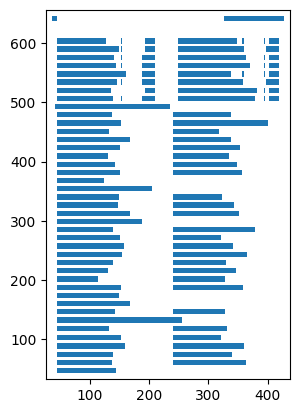

In [118]:
camelot.plot(tables[0], kind='text').show()

In [119]:
d2[18]

,0,1,2,3
0,18,,,"Berl. ornithol. Ber. 23, 2013"
1,Rebhuhn (Perdix perdix),1996,Tüpfelralle (Porzana porzana),2011
2,Rotkopfwürger (Lanius senator),1890,Turteltaube (Streptopelia turtur),< 1945
3,Rotschenkel (Tringa totanus),1878,Wacholderdrossel (Turdus pilaris),2009
4,Schreiadler (Aquila pomarina),1893,Waldwasserläufer (Tringa ochropus),1860
5,Schwarzstirnwürger (Lanius minor),1921,Wiedehopf (Upupa epops),1993
6,Schwarzstorch (Ciconia nigra),1900,Wiesenweihe (Circus pygargus),< 1900
7,Steinkauz (Athene noctua),1969,Ziegenmelker (Caprimulgus europaeus),1926
8,Triel (Burhinus oedicnemus),< 1945,Zwergseeschwalbe (Sternula albifrons),1878
9,,Kategorie 1: Bestand vom Erlöschen bedroht (17...,,


In [120]:
# Cleaning d2[17]

In [121]:
d2[17].head()
# Remove first 4 rows
d2[17] = d2[17].drop([0,1,2,3], axis=0)
d2[17].head()

,0,1,2,3
4,Birkhuhn (Tetrao tetrix),< 1900,Großtrappe (Otis tarda),< 1925
5,Blaukehlchen (Luscinia svecica),1993,Kampfläufer (Philomachus pugnax),< 1900
6,Blauracke (Coracias garrulus),1955,Kleinralle (Porzana parva),2011
7,Fischadler (Pandion haliaetus),1875,Kornweihe (Circus cyaneus),< 1900
8,Fluss-Seeschwalbe (Sterna hirundo),1878,Löffelente (Anas clypeata),2012


In [122]:
d2[17].tail()

,0,1,2,3
7,Fischadler (Pandion haliaetus),1875,Kornweihe (Circus cyaneus),< 1900
8,Fluss-Seeschwalbe (Sterna hirundo),1878,Löffelente (Anas clypeata),2012
9,Flussuferläufer (Actitis hypoleucos),1972,Moorente (Aythya nyroca),< 1875
10,Gänsesäger (Mergus merganser),1945,Ortolan (Emberiza hortulana),1967
11,Großer Brachvogel (Numenius arquata),1878,Raubwürger (Lanius excubitor),1995


In [123]:
second_column = d2[17].copy().loc[:,2:3]
second_column

,2,3
4,Großtrappe (Otis tarda),< 1925
5,Kampfläufer (Philomachus pugnax),< 1900
6,Kleinralle (Porzana parva),2011
7,Kornweihe (Circus cyaneus),< 1900
8,Löffelente (Anas clypeata),2012
9,Moorente (Aythya nyroca),< 1875
10,Ortolan (Emberiza hortulana),1967
11,Raubwürger (Lanius excubitor),1995


In [124]:
#Renaming the columns
second_column.rename(columns = {
    2: "Species",
    3: "Letzter_Nachweis"} , inplace = True)
second_column.head()

,Species,Letzter_Nachweis
4,Großtrappe (Otis tarda),< 1925
5,Kampfläufer (Philomachus pugnax),< 1900
6,Kleinralle (Porzana parva),2011
7,Kornweihe (Circus cyaneus),< 1900
8,Löffelente (Anas clypeata),2012


In [125]:
# removing column 2 and 3 from d2[17]
d2[17] = d2[17].drop([2,3], axis=1)
d2[17]

,0,1
4,Birkhuhn (Tetrao tetrix),< 1900
5,Blaukehlchen (Luscinia svecica),1993
6,Blauracke (Coracias garrulus),1955
7,Fischadler (Pandion haliaetus),1875
8,Fluss-Seeschwalbe (Sterna hirundo),1878
9,Flussuferläufer (Actitis hypoleucos),1972
10,Gänsesäger (Mergus merganser),1945
11,Großer Brachvogel (Numenius arquata),1878


In [126]:
#Renaming the columns
d2[17].rename(columns = {
    0: "Species",
    1: "Letzter_Nachweis"} , inplace = True)
d2[17].head()

,Species,Letzter_Nachweis
4,Birkhuhn (Tetrao tetrix),< 1900
5,Blaukehlchen (Luscinia svecica),1993
6,Blauracke (Coracias garrulus),1955
7,Fischadler (Pandion haliaetus),1875
8,Fluss-Seeschwalbe (Sterna hirundo),1878


In [130]:
# concatanating removed section (second_column) with edited d2[17]
d2[17] = pd.concat([d2[17],second_column])
d2[17]

,Species,Letzter_Nachweis
4,Birkhuhn (Tetrao tetrix),< 1900
5,Blaukehlchen (Luscinia svecica),1993
6,Blauracke (Coracias garrulus),1955
7,Fischadler (Pandion haliaetus),1875
8,Fluss-Seeschwalbe (Sterna hirundo),1878
9,Flussuferläufer (Actitis hypoleucos),1972
10,Gänsesäger (Mergus merganser),1945
11,Großer Brachvogel (Numenius arquata),1878
4,Großtrappe (Otis tarda),< 1925
5,Kampfläufer (Philomachus pugnax),< 1900


In [131]:
# Cleaning d2[18]

In [133]:
# remove row 0 and row 9
d2[18] = d2[18].drop([0,9], axis=0)
d2[18].head()

,0,1,2,3
1,Rebhuhn (Perdix perdix),1996,Tüpfelralle (Porzana porzana),2011
2,Rotkopfwürger (Lanius senator),1890,Turteltaube (Streptopelia turtur),< 1945
3,Rotschenkel (Tringa totanus),1878,Wacholderdrossel (Turdus pilaris),2009
4,Schreiadler (Aquila pomarina),1893,Waldwasserläufer (Tringa ochropus),1860
5,Schwarzstirnwürger (Lanius minor),1921,Wiedehopf (Upupa epops),1993


In [134]:
d2[18].tail()

,0,1,2,3
4,Schreiadler (Aquila pomarina),1893,Waldwasserläufer (Tringa ochropus),1860
5,Schwarzstirnwürger (Lanius minor),1921,Wiedehopf (Upupa epops),1993
6,Schwarzstorch (Ciconia nigra),1900,Wiesenweihe (Circus pygargus),< 1900
7,Steinkauz (Athene noctua),1969,Ziegenmelker (Caprimulgus europaeus),1926
8,Triel (Burhinus oedicnemus),< 1945,Zwergseeschwalbe (Sternula albifrons),1878


In [135]:
second_column = d2[18].copy().loc[:,2:3]
second_column

,2,3
1,Tüpfelralle (Porzana porzana),2011
2,Turteltaube (Streptopelia turtur),< 1945
3,Wacholderdrossel (Turdus pilaris),2009
4,Waldwasserläufer (Tringa ochropus),1860
5,Wiedehopf (Upupa epops),1993
6,Wiesenweihe (Circus pygargus),< 1900
7,Ziegenmelker (Caprimulgus europaeus),1926
8,Zwergseeschwalbe (Sternula albifrons),1878


In [136]:
#Renaming the columns
second_column.rename(columns = {
    2: "Species",
    3: "Letzter_Nachweis"} , inplace = True)
second_column.head()

,Species,Letzter_Nachweis
1,Tüpfelralle (Porzana porzana),2011
2,Turteltaube (Streptopelia turtur),< 1945
3,Wacholderdrossel (Turdus pilaris),2009
4,Waldwasserläufer (Tringa ochropus),1860
5,Wiedehopf (Upupa epops),1993


In [137]:
# removing column 2 and 3 from d2[18]
d2[18] = d2[18].drop([2,3], axis=1)
d2[18]

,0,1
1,Rebhuhn (Perdix perdix),1996
2,Rotkopfwürger (Lanius senator),1890
3,Rotschenkel (Tringa totanus),1878
4,Schreiadler (Aquila pomarina),1893
5,Schwarzstirnwürger (Lanius minor),1921
6,Schwarzstorch (Ciconia nigra),1900
7,Steinkauz (Athene noctua),1969
8,Triel (Burhinus oedicnemus),< 1945


In [138]:
#Renaming the columns
d2[18].rename(columns = {
    0: "Species",
    1: "Letzter_Nachweis"} , inplace = True)
d2[18].head()

,Species,Letzter_Nachweis
1,Rebhuhn (Perdix perdix),1996
2,Rotkopfwürger (Lanius senator),1890
3,Rotschenkel (Tringa totanus),1878
4,Schreiadler (Aquila pomarina),1893
5,Schwarzstirnwürger (Lanius minor),1921


In [139]:
# concatanating removed section (second_column) with edited d2[18]
d2[18] = pd.concat([d2[18],second_column])
d2[18]

,Species,Letzter_Nachweis
1,Rebhuhn (Perdix perdix),1996
2,Rotkopfwürger (Lanius senator),1890
3,Rotschenkel (Tringa totanus),1878
4,Schreiadler (Aquila pomarina),1893
5,Schwarzstirnwürger (Lanius minor),1921
6,Schwarzstorch (Ciconia nigra),1900
7,Steinkauz (Athene noctua),1969
8,Triel (Burhinus oedicnemus),< 1945
1,Tüpfelralle (Porzana porzana),2011
2,Turteltaube (Streptopelia turtur),< 1945


In [140]:
# Merging both pages
last_observed = pd.concat([d2[17],d2[18]])
last_observed

,Species,Letzter_Nachweis
4,Birkhuhn (Tetrao tetrix),< 1900
5,Blaukehlchen (Luscinia svecica),1993
6,Blauracke (Coracias garrulus),1955
7,Fischadler (Pandion haliaetus),1875
8,Fluss-Seeschwalbe (Sterna hirundo),1878
9,Flussuferläufer (Actitis hypoleucos),1972
10,Gänsesäger (Mergus merganser),1945
11,Großer Brachvogel (Numenius arquata),1878
4,Großtrappe (Otis tarda),< 1925
5,Kampfläufer (Philomachus pugnax),< 1900


In [154]:
# Splitting common name species name combination and keeping only species name
# Editing species column based on binomial nomenclature

df1 = last_observed.Species.str.split(pat=r')', n = 3, expand = True)
df1 = df1[0].str.split(pat=r'(', n = 3, expand = True)
last_observed.Species = df1[1]
last_observed

,Species,Letzter_Nachweis
4,Tetrao tetrix,< 1900
5,Luscinia svecica,1993
6,Coracias garrulus,1955
7,Pandion haliaetus,1875
8,Sterna hirundo,1878
9,Actitis hypoleucos,1972
10,Mergus merganser,1945
11,Numenius arquata,1878
4,Otis tarda,< 1925
5,Philomachus pugnax,< 1900


In [155]:
df2

,Common_name,Species,Status,BP_Rev,Häufig_keitsklasse,Trend_lang,Trend_kurz,Risik,BE2013,BE2003,BB2008,D2007
0,Löffelente *,Anas clypeata,I ex,"0 – 1, 2012: 1 BP",ex,,,,0,1,2,3
1,Moorente,Aythya nyroca,I ex,erloschen,ex,,,,0,0,1,1
2,Gänsesäger,Mergus merganser,I ex,erloschen,ex,,,,0,0,2,2
3,Rebhuhn *,Perdix perdix,I ex,"erloschen, zuletzt: 1996",ex,,,,0,1,2,2
4,Birkhuhn,Tetrao terix,I ex,erloschen,ex,,,,0,0,1,2
5,Schwarzstorch,Ciconia nigra,I ex,erloschen,ex,,,,0,0,3,
6,Fischadler,Pandion haliaetus,I ex,erloschen,ex,,,,0,0,,3
7,Schreiadler,Aquila pomarina,I ex,erloschen,ex,,,,0,0,1,1
8,Kornweihe,Circus cyaneus,I ex,erloschen,ex,,,,0,0,0,2
9,Wiesenweihe,Circus pygargus,I ex,erloschen,ex,,,,0,0,2,2


In [156]:
# Merging the last observed column in to the original dataframe df2
df2 = df2.merge(last_observed, 
          how = "left", 
          on = "Species")
df2

,Common_name,Species,Status,BP_Rev,Häufig_keitsklasse,Trend_lang,Trend_kurz,Risik,BE2013,BE2003,BB2008,D2007,Letzter_Nachweis
0,Löffelente *,Anas clypeata,I ex,"0 – 1, 2012: 1 BP",ex,,,,0,1,2,3,2012
1,Moorente,Aythya nyroca,I ex,erloschen,ex,,,,0,0,1,1,< 1875
2,Gänsesäger,Mergus merganser,I ex,erloschen,ex,,,,0,0,2,2,1945
3,Rebhuhn *,Perdix perdix,I ex,"erloschen, zuletzt: 1996",ex,,,,0,1,2,2,1996
4,Birkhuhn,Tetrao terix,I ex,erloschen,ex,,,,0,0,1,2,NaN
5,Schwarzstorch,Ciconia nigra,I ex,erloschen,ex,,,,0,0,3,,1900
6,Fischadler,Pandion haliaetus,I ex,erloschen,ex,,,,0,0,,3,1875
7,Schreiadler,Aquila pomarina,I ex,erloschen,ex,,,,0,0,1,1,1893
8,Kornweihe,Circus cyaneus,I ex,erloschen,ex,,,,0,0,0,2,< 1900
9,Wiesenweihe,Circus pygargus,I ex,erloschen,ex,,,,0,0,2,2,< 1900


In [157]:
# Updated export location
# export the dataframe as CSV
df2.to_csv('../../Transformation/Raw_csv/Aves.csv', 
          index = False
         )